In [113]:
import numpy as np
import matplotlib.pyplot as plt
from Neumann_Pressure import make_pure_Neumann_matrix, pure_Neumann_Poisson_solver

In [114]:
def decomposition (vector, basis_matrix, values):
    """
    A*x_vec = y_vec
    x_vec = summ_k a_k*eigen_vec_k
    => summ_k a_k*eigen_value_k*vec_k = y_vec
    y_vec = summ_k b_k*vec_k
    => a_k = b_k/eigen_value_k
    """
    matrix = np.zeros(shape=basis_matrix.shape, dtype='complex128')
    for i in range(matrix.shape[1]):
        matrix.T[i] = basis_matrix.T[i]*values[i]
    print(matrix.shape)
    coefficients = np.linalg.pinv(matrix)@vector
    return coefficients

Text(0.5, 1.0, 'A=w**3/(12*viscosity)')

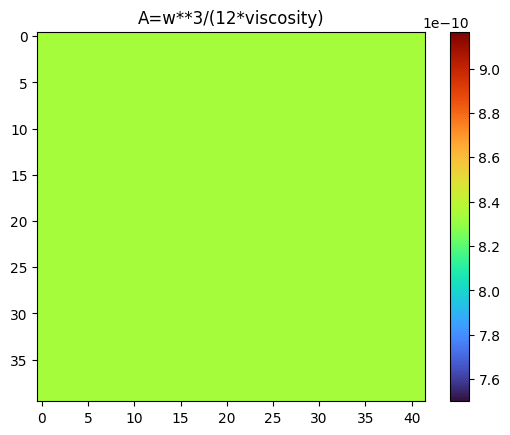

In [115]:
Nx = 40
Ny = Nx
L = 1
H = 1
dx = L/Nx
dy = H/Ny
mu = 0.1
w = 0.001
v_in = 0.1
Q = 12*v_in*mu/(w**2)
A = w**3/12/mu*np.ones(shape=(Ny, Nx+2))
# A.T[:-10] = A.T[-1]*100
f = np.zeros(shape=(Ny,Nx))
top = np.zeros(Nx) 
bottom= np.zeros(Nx) 
left = -Q*np.ones(Ny) 
right = Q*np.ones(Ny) 

plt.imshow(A, cmap='turbo')
plt.colorbar()
plt.title('A=w**3/(12*viscosity)')

1

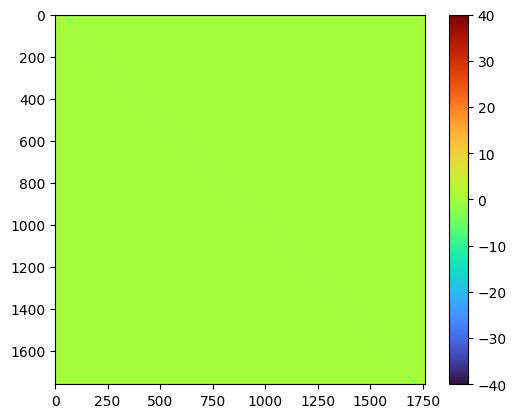

In [116]:
M = make_pure_Neumann_matrix(Nx+2, Ny+2, A, dx, dy)
plt.imshow(M, cmap='turbo')
plt.colorbar()
(Nx+2)*(Ny+2)-4 - np.linalg.matrix_rank(M)


Text(0, 0.5, 'Imaginary')

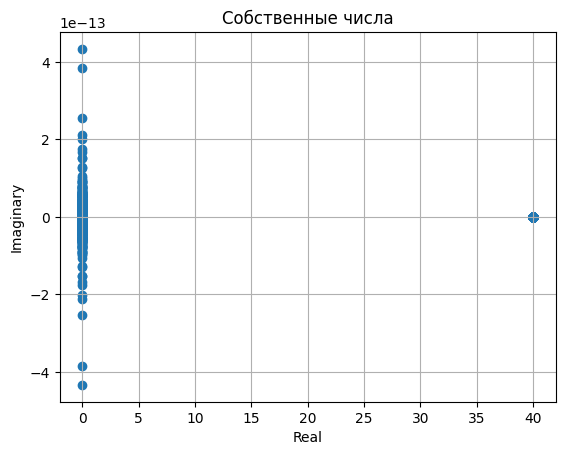

In [117]:
evals, evecs = np.linalg.eig(M)
plt.scatter(np.real(evals),np.imag(evals))
plt.grid()
plt.title("Собственные числа")
plt.xlabel('Real')
plt.ylabel('Imaginary')

Text(0.5, 1.0, 'Правая часть')

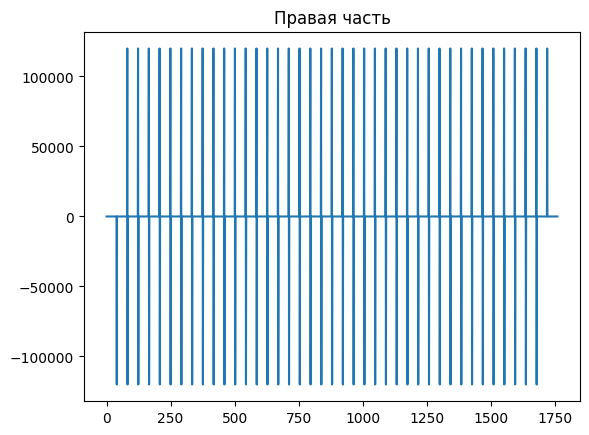

In [118]:
right_side_matrix = np.zeros(shape=(Ny+2, Nx+2))
right_side_matrix[1:-1, 1:-1] = f
right_side_matrix[0, 1:-1] = top
right_side_matrix[-1, 1:-1] = bottom
right_side_matrix.T[0, 1:-1] = left 
right_side_matrix.T[-1, 1:-1] = right 

right_side_vec = right_side_matrix.reshape(-1)
vec = np.delete(right_side_vec, [1, Nx-1, -Nx, -1])  
plt.plot(vec)
plt.title("Правая часть")

(1760, 1760)


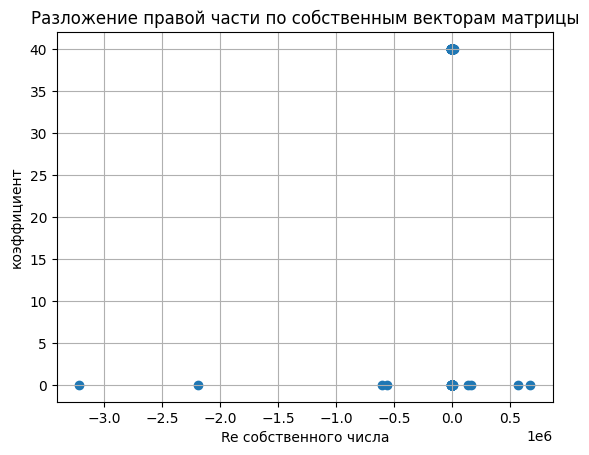

In [119]:
a = decomposition(vec, evecs, evals)
plt.scatter(a, np.real(evals))
plt.title("Разложение правой части по собственным векторам матрицы")
plt.xlabel("Re собственного числа")
plt.ylabel("коэффициент")
plt.grid()

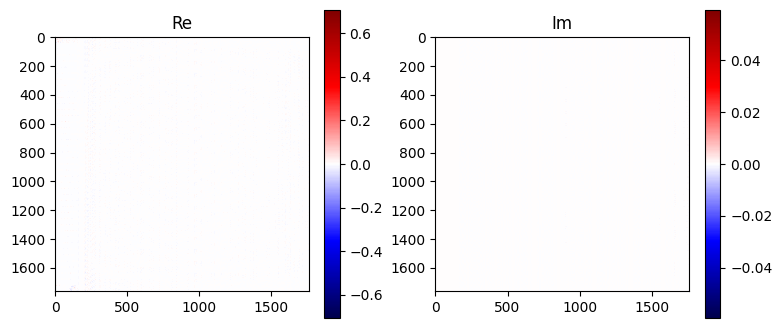

In [120]:
fig=plt.figure(figsize=(9,4))
plt.subplot(121)
plt.imshow(np.real(evecs), cmap='seismic')
plt.colorbar()
plt.title("Re")
plt.subplot(122)
plt.imshow(np.imag(evecs), cmap='seismic')
plt.title('Im')
plt.colorbar()

8.377768801877708e-09

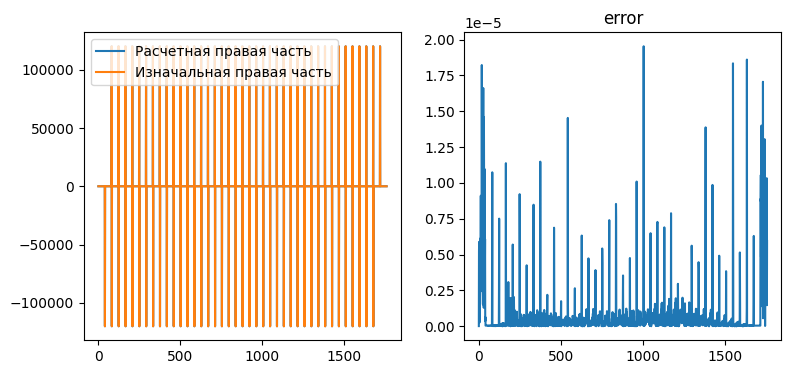

In [121]:
res = evecs@a
fig = plt.figure(figsize=(9,4))
plt.subplot(121)
plt.plot(np.real(M@(res)), label='Расчетная правая часть')
plt.plot(vec, label='Изначальная правая часть')
plt.legend()
plt.subplot(122)
plt.plot(np.abs(vec-M@res))
plt.title('error')
np.sum(np.square(np.abs(vec-M@res)))

C:\Users\user\AppData\Local\Temp\ipykernel_3720\2312848132.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  Pressure_matrix[0, 1:-1] = res[:Nx]
C:\Users\user\AppData\Local\Temp\ipykernel_3720\2312848132.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  Pressure_matrix[1:-1] = res[Nx: -(Nx)].reshape(Ny, Nx+2)
C:\Users\user\AppData\Local\Temp\ipykernel_3720\2312848132.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  Pressure_matrix[-1, 1:-1] = res[-(Nx):]


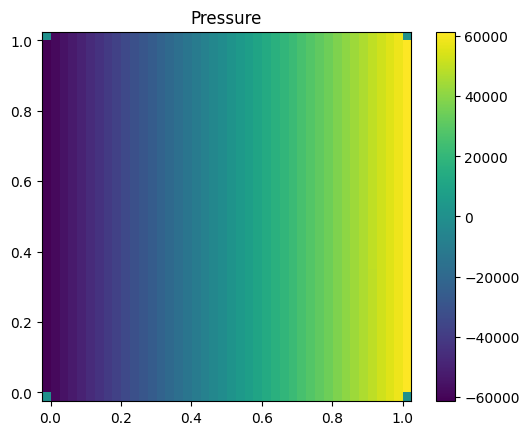

In [122]:
Pressure_matrix = np.zeros(shape=(Ny+2, Nx+2))
Pressure_matrix[0, 1:-1] = res[:Nx]
Pressure_matrix[1:-1] = res[Nx: -(Nx)].reshape(Ny, Nx+2)
Pressure_matrix[-1, 1:-1] = res[-(Nx):]
plt.imshow(Pressure_matrix, extent=[-L/Nx, L+L/Nx, -H/Ny, H+H/Ny])
plt.title('Pressure')
plt.colorbar()

start decomposition
end decomposition
start matmul
end matmul


0.68026733

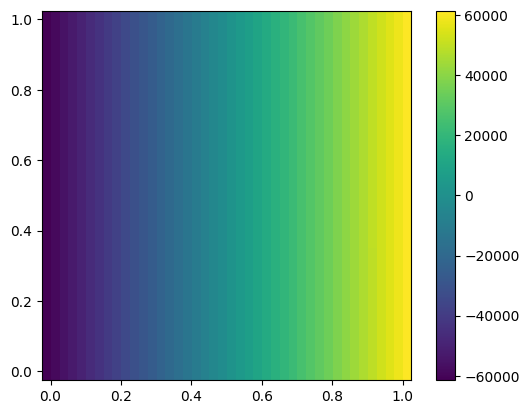

In [123]:
P, error = pure_Neumann_Poisson_solver(A, f, top, bottom, left, right, Nx ,Ny, L, H)
plt.imshow(P, extent=[-L/Nx, L+L/Nx, -H/Ny, H+H/Ny])
plt.colorbar()
error